# Assignment 1 - Online Gaming Anxiety Data

Zulfiya Usmonova, NSE03, 210141

# Import and initial look into a dataset

### Dataset: Online Gaming Anxiety Data

Link: https://www.kaggle.com/datasets/divyansh22/online-gaming-anxiety-data?resource=download <br>
Survey information: https://osf.io/vyr5f 

### Imports

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,LogisticRegression
from sklearn.metrics import r2_score , mean_squared_error ,confusion_matrix,accuracy_score
import string as st
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
import matplotlib as mpl

### Data understanding

In [2]:
df = pd.read_csv("gaming.csv", encoding = 'ISO-8859-1')
df.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S. No.,13464.0,7096.839201,4114.478220,1.00000,3532.750000,7087.500000,10654.250000,14250.00000
Timestamp,13464.0,42054.841222,0.272948,42052.00437,42054.716548,42054.800675,42054.932112,42058.36375
GAD1,13464.0,0.860963,0.926542,0.00000,0.000000,1.000000,1.000000,3.00000
GAD2,13464.0,0.673351,0.915724,0.00000,0.000000,0.000000,1.000000,3.00000
GAD3,13464.0,0.965761,0.982776,0.00000,0.000000,1.000000,2.000000,3.00000
GAD4,13464.0,0.724079,0.921971,0.00000,0.000000,0.000000,1.000000,3.00000
GAD5,13464.0,0.488042,0.837014,0.00000,0.000000,0.000000,1.000000,3.00000
GAD6,13464.0,0.911022,0.931168,0.00000,0.000000,1.000000,1.000000,3.00000
GAD7,13464.0,0.588755,0.894408,0.00000,0.000000,0.000000,1.000000,3.00000
SWL1,13464.0,3.720440,1.736264,1.00000,2.000000,4.000000,5.000000,7.00000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [5]:
df.isnull().sum()

S. No.                 0
Timestamp              0
GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                 649
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                 30
earnings               0
whyplay                0
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175


# Timestamp manipulation

In [6]:
gaming_df = df
gaming_df['Timestamp'].head()

gaming_df['Timestamp_converted'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(gaming_df['Timestamp'], unit='D')

gaming_df[['Timestamp', 'Timestamp_converted']].head()

,Timestamp,Timestamp_converted
0,42052.00437,2015-02-17 00:06:17.568000207
1,42052.00680,2015-02-17 00:09:47.520000241
2,42052.03860,2015-02-17 00:55:35.039999991
3,42052.06804,2015-02-17 01:37:58.655999853
4,42052.08948,2015-02-17 02:08:51.072000207


# Data cleansing and processing

GADE                 649
Hours                 30
League              1852
highestleague      13464
streams              100
SPIN1                124
SPIN2                154
SPIN3                140
SPIN4                159
SPIN5                166
SPIN6                156
SPIN7                138
SPIN8                144
SPIN9                158
SPIN10               160
SPIN11               187
SPIN12               168
SPIN13               187
SPIN14               156
SPIN15               147
SPIN16               147
SPIN17               175
Narcissism            23
Work                  38
Degree              1577
Reference             15
accept               414
SPIN_T               650
Residence_ISO3       110
Birthplace_ISO3      121
dtype: int64


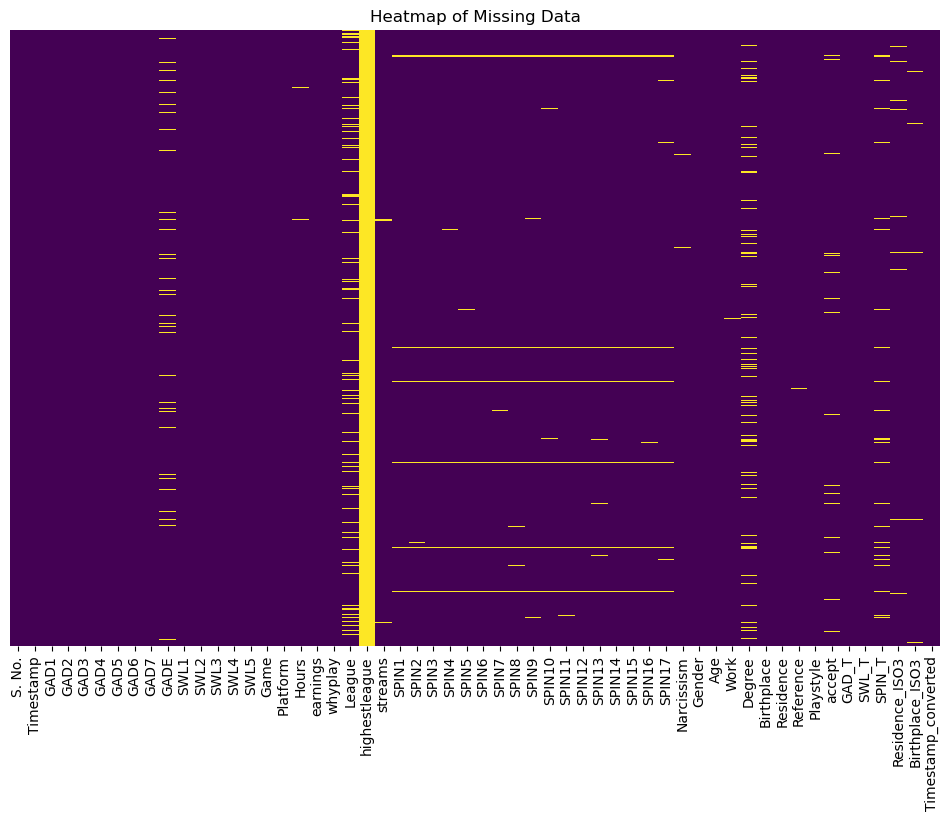

In [7]:
missing_values = gaming_df.isnull().sum()

print(missing_values[missing_values > 0])

plt.figure(figsize=(12, 8))
sns.heatmap(gaming_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()

In [8]:
gaming_df.GADE.value_counts()

GADE
Not difficult at all    6236
Somewhat difficult      5148
Very difficult          1012
Extremely difficult      419
Name: count, dtype: int64

In [9]:
gaming_df.GADE.fillna(gaming_df.GADE.value_counts().index[1] , inplace=True) 

In [10]:
gaming_df.GADE.value_counts()

GADE
Not difficult at all    6236
Somewhat difficult      5797
Very difficult          1012
Extremely difficult      419
Name: count, dtype: int64

In [11]:
gaming_df.streams.fillna(int(gaming_df.streams.mean()) , inplace = True)
gaming_df.Hours.fillna(int(gaming_df.Hours.mean()) , inplace = True)

In [12]:
gaming_df['Hours_streams'] = gaming_df['Hours'] + gaming_df['streams']
gaming_df.drop(gaming_df.loc[(gaming_df['Hours_streams'] > 115) | (gaming_df['Hours_streams'] == 0)].index, axis=0, inplace=True)

In [13]:
gaming_df['Hours_streams'].value_counts()

Hours_streams
30.0     961
25.0     765
40.0     732
35.0     691
20.0     662
        ... 
114.0      1
93.0       1
87.0       1
94.0       1
109.0      1
Name: count, Length: 108, dtype: int64

In [14]:
gaming_df = gaming_df.drop(['S. No.', 'Timestamp', 'highestleague', 'Hours_streams'], axis=1)

In [15]:
gaming_df.columns

Index(['GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GADE', 'SWL1',
       'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game', 'Platform', 'Hours', 'earnings',
       'whyplay', 'League', 'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4',
       'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11',
       'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17',
       'Narcissism', 'Gender', 'Age', 'Work', 'Degree', 'Birthplace',
       'Residence', 'Reference', 'Playstyle', 'accept', 'GAD_T', 'SWL_T',
       'SPIN_T', 'Residence_ISO3', 'Birthplace_ISO3', 'Timestamp_converted'],
      dtype='object')

In [16]:
gaming_df.League.nunique()

1442

In [17]:
gaming_df.League = gaming_df.League.str.lower().str.strip()
print(gaming_df.League.nunique())

1198


In [18]:
gaming_df["League"].value_counts().head(50)

League
gold            1347
silver           899
platinum         838
diamond          728
unranked         393
gold 3           265
gold 1           264
diamond 5        264
gold 5           263
silver 1         250
gold v           227
silver 2         219
gold 2           218
silver 3         199
bronze           191
platinum 3       159
gold 4           156
platinum 1       143
silver 4         138
platinum 2       138
platinum 5       128
silver 5         121
diamond v        110
platinum 4       102
plat             100
diamond 3         96
diamond 4         96
platinum v        89
plat 5            87
plat 3            84
gold iv           82
diamond 1         75
master            74
plat 2            72
gold iii          69
bronze 1          69
silver iii        68
plat 1            67
plat 4            62
diamond 2         61
silver v          59
silver iv         59
bronze 2          58
bronze 3          55
challenger        53
silver i          52
silver ii         50
platin

In [19]:
gaming_df["League"] = gaming_df["League"].str.extract(r'^([a-z]+)')

In [20]:
print(gaming_df.League.nunique())
print(gaming_df.League.unique())

206
[nan 'gold' 'none' 'na' 'diamond' 'not' 'bronze' 'silver' 'n' 'unranked'
 'bad' 'legendary' 'global' 'potato' 'master' 'silverii' 'platinum'
 'masters' 'challenger' 'lvl' 'platin' 'promos' 'top' 'd' 'plat' 'i'
 'rank' 'grandmaster' 'platnium' 's' 'haven' 'platinium' 'in' 'gv'
 'provisional' 'placements' 'g' 'was' 'the' 'division' 'pplatinum' 'hr'
 'only' 'platium' 'legend' 'platine' 'plarinum' 'dmg' 'sliver' 'dont'
 'high' 'very' 'starcraft' 'challenjour' 'fusion' 'low' 'unraked' 'havent'
 'got' 'golden' 'cs' 'p' 'standard' 'still' 'highest' 'nope' 'dia'
 'league' 'nova' 'mge' 'silber' 'siver' 'never' 'b' 'platinun' 'mg'
 'supreme' 'for' 'greater' 'wood' 'le' 'no' 'natural' 'aram' 'don'
 'currently' 'noone' 'grand' 'hs' 'current' 'last' 'first' 'recently'
 'fucking' 'grandmasters' 'golf' 'of' 'glod' 'tier' 'soloq' 'unrranked'
 'esl' 'golld' 'double' 'used' 'new' 'lem' 'csgo' 'c' 'platonum' 'eu'
 'bronce' 'sil' 'finished' 'what' 'zilean' 'unrank' 'cardboard' 'goled'
 'ranked' 'heroi

In [21]:
gaming_df.loc[(gaming_df['whyplay'] == 'having fun') ,'League'] = gaming_df.loc[(gaming_df['whyplay'] == 'having fun') ,'League'].fillna('unranked')
gaming_df.League.fillna(gaming_df.League.mode, inplace = True)

In [22]:
gaming_df.League.nunique()

207

In [23]:
print(gaming_df['League'].apply(type).unique())

[<class 'str'> <class 'method'>]


In [24]:
gaming_df['League'] = gaming_df['League'].apply(lambda x: str(x) if isinstance(x, (str, int, float)) else np.nan)

counts = gaming_df['League'].value_counts()
rare_leagues = counts[counts < 3].index

gaming_df['League'] = gaming_df['League'].apply(lambda x: np.nan if x in rare_leagues else x)

invalid_leagues = ['i', 'currently', 'high', 'season', 'lol', 'cs', 'last', 'csgo', 'starcraft', 'geater', 'in', 'rank', 'still']
gaming_df['League'] = gaming_df['League'].replace(invalid_leagues, np.nan)

print(gaming_df['League'].head())

0    unranked
1    unranked
3         NaN
4    unranked
5         NaN
Name: League, dtype: object


In [25]:
gaming_df.League.fillna('unspecified' , inplace=True)

In [26]:
gaming_df.League.unique()

array(['unranked', 'unspecified', 'gold', 'none', 'na', 'diamond', 'not',
       'bronze', 'silver', 'n', 'legendary', 'master', 'platinum',
       'masters', 'challenger', 'platin', 'top', 'd', 'plat',
       'grandmaster', 'platnium', 's', 'haven', 'platinium', 'placements',
       'g', 'was', 'platium', 'legend', 'platine', 'plarinum', 'dmg',
       'sliver', 'challenjour', 'unraked', 'havent', 'p', 'dia', 'league',
       'nova', 'mge', 'b', 'mg', 'supreme', 'greater', 'wood', 'no',
       'don', 'golf', 'lem', 'bronce', 'placement'], dtype=object)

In [27]:
replace_dict = {
    'platin': 'platinum',
    'plat': 'platinum',
    'platnium': 'platinum',
    'platinium': 'platinum',
    'platium': 'platinum',
    'platine': 'platinum',
    'plarinum': 'platinum',

    'master': 'masters',
    'masters': 'masters',
    'grandmaster': 'masters',

    'n': 'none',
    'na': 'none',
    'no': 'none',
    'not': 'none',
    'none': 'none',

    'sliver': 'silver',
    'bronce': 'bronze',
    'challenjour': 'challenger',
    'unraked': 'unranked',
    'havent': 'unranked',
    'dia' : 'diamond',
    'nan' : 'unspecified'
}

gaming_df['League'] = gaming_df['League'].replace(replace_dict)

print(gaming_df['League'].unique())

['unranked' 'unspecified' 'gold' 'none' 'diamond' 'bronze' 'silver'
 'legendary' 'masters' 'platinum' 'challenger' 'top' 'd' 's' 'haven'
 'placements' 'g' 'was' 'legend' 'dmg' 'p' 'league' 'nova' 'mge' 'b' 'mg'
 'supreme' 'greater' 'wood' 'don' 'golf' 'lem' 'placement']


In [28]:
gaming_df.League.isnull().sum()

0

In [29]:
gaming_df.League.value_counts()

League
gold           3129
platinum       2619
silver         2239
diamond        1576
unranked       1526
unspecified    1192
bronze          534
masters         175
none             96
challenger       73
d                49
s                34
g                30
placements       21
b                11
dmg              11
was              10
p                10
haven             8
league            7
top               6
placement         6
legend            6
legendary         6
nova              5
don               5
mge               5
supreme           4
greater           4
wood              4
mg                3
golf              3
lem               3
Name: count, dtype: int64

In [30]:
gaming_df['Narcissism'].value_counts()

Narcissism
1.0    5240
2.0    4344
3.0    2334
4.0    1147
5.0     322
Name: count, dtype: int64

In [31]:
missing_values = gaming_df.isnull().sum()

print(missing_values[missing_values > 0])

SPIN1               124
SPIN2               154
SPIN3               140
SPIN4               159
SPIN5               165
SPIN6               155
SPIN7               137
SPIN8               143
SPIN9               158
SPIN10              159
SPIN11              187
SPIN12              168
SPIN13              187
SPIN14              156
SPIN15              147
SPIN16              147
SPIN17              175
Narcissism           23
Work                 38
Degree             1568
Reference            15
accept              413
SPIN_T              647
Residence_ISO3      103
Birthplace_ISO3     116
dtype: int64


In [32]:
gaming_df.drop(['Birthplace', 'Birthplace_ISO3'], axis=1, inplace=True)

In [33]:
gaming_df['Residence'] = gaming_df['Residence'].replace('Unknown',gaming_df['Residence'].mode()[0])

In [34]:
gaming_df['Reference'].fillna('Other',inplace=True)

In [35]:
# we drop access NaN values, because in the surver Accept field was compulsory, and has only one option to choose,
# so this NaN are probably some error records, and anyways, the answers to the survey that were not taken as 
# accept cannot be considered during analysis
gaming_df.drop(gaming_df[gaming_df['accept'].isnull()].index , axis=0 , inplace=True)

In [36]:
gaming_df['Residence_ISO3'].fillna('USA',inplace=True)

In [37]:
gaming_df.Residence_ISO3.unique()

array(['USA', 'KOR', 'JPN', 'FIN', 'CAN', 'AUS', 'GBR', 'BIH', 'IRL',
       'DEU', 'MYS', 'ROU', 'SWE', 'GRC', 'TUR', 'BEL', 'LVA', 'AUT',
       'ZAF', 'HRV', 'CHE', 'IND', 'NLD', 'DNK', 'PRT', 'FRA', 'ARG',
       'EST', 'RUS', 'CZE', 'LTU', 'NOR', 'SGP', 'POL', 'CHN', 'SRB',
       'MAR', 'ESP', 'SAU', 'SVK', 'BGR', 'ITA', 'SVN', 'JOR', 'BRA',
       'VEN', 'TUN', 'ISR', 'QAT', 'UKR', 'MEX', 'MKD', 'PHL', 'HUN',
       'EGY', 'ISL', 'NZL', 'LUX', 'CYP', 'DZA', 'ARE', 'BLR', 'CHL',
       'LBN', 'THA', 'PER', 'NAM', 'URY', 'KWT', 'BGD', 'MLT', 'SYR',
       'COL', 'DOM', 'NIC', 'HKG', 'VNM', 'KAZ', 'ALB', 'GLP', 'GRD',
       'TTO', 'PAN', 'IDN', 'LIE', 'PRI', 'TWN', 'CRI', 'BLZ', 'JAM',
       'GEO', 'FRO', 'GTM', 'MDA', 'MNG', 'HND', 'MNE', 'BHR', 'BOL',
       'SLV', 'ECU', 'PAK', 'VCT', 'BRN', 'FJI', 'GIB', 'PSE'],
      dtype=object)

In [38]:
col = ['SPIN1','SPIN2','SPIN3','SPIN4','SPIN5','SPIN6','SPIN7','SPIN8','SPIN9',
     'SPIN10','SPIN11','SPIN12','SPIN13','SPIN14','SPIN15','SPIN16','SPIN17' ,'SPIN_T']
for i in col :
    gaming_df[i].fillna(gaming_df[i].mode()[0], inplace = True)

In [39]:
gaming_df['Playstyle'] = gaming_df['Playstyle'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
gaming_df['earnings'] = gaming_df['earnings'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))
gaming_df['whyplay'] = gaming_df['whyplay'].apply(lambda x: ' '.join(word.strip(st.punctuation) for word in x.split()))

In [40]:
gaming_df['Playstyle'] = gaming_df['Playstyle'].str.lower().str.strip()
gaming_df['whyplay'] = gaming_df['whyplay'].str.lower().str.strip()
gaming_df['earnings'] = gaming_df['earnings'].str.lower().str.strip()

In [41]:
gaming_df.isnull().sum()

GAD1                      0
GAD2                      0
GAD3                      0
GAD4                      0
GAD5                      0
GAD6                      0
GAD7                      0
GADE                      0
SWL1                      0
SWL2                      0
SWL3                      0
SWL4                      0
SWL5                      0
Game                      0
Platform                  0
Hours                     0
earnings                  0
whyplay                   0
League                    0
streams                   0
SPIN1                     0
SPIN2                     0
SPIN3                     0
SPIN4                     0
SPIN5                     0
SPIN6                     0
SPIN7                     0
SPIN8                     0
SPIN9                     0
SPIN10                    0
SPIN11                    0
SPIN12                    0
SPIN13                    0
SPIN14                    0
SPIN15                    0
SPIN16              

In [42]:
gaming_df.Work.fillna(df.Work.mode()[0] , inplace=True)

In [43]:
gaming_df.Degree.unique()

array(['Bachelor\xa0(or equivalent)',
       'High school diploma (or equivalent)',
       'Ph.D., Psy. D., MD (or equivalent)', 'Master\xa0(or equivalent)',
       nan], dtype=object)

In [44]:
gaming_df.Degree.fillna('High school diploma (or equivalent)', inplace=True)

In [45]:
gaming_df.earnings.unique()

array(['i play for fun',
       'i play mostly for fun but earn a little on the side tournament winnings streaming etc',
       'for fun and to get better',
       'i intend to do both if i become good enough at some point',
       'for fun and improvement',
       'i play for fun atm but i pretend to earn a little by streaming',
       'i earn a living by playing this game', 'escapism',
       'i play to escape life', 'want to be a shoutcaster',
       'i play to forget about real life',
       'play for fun and to get better at it',
       'i play for the competitive aspect',
       'play for fun would like to earn money for it',
       'wants money but dont get it',
       'i play with unrealistic dreams of making money', 'eloboosting',
       "i think i might be addicted in the way that i think playing will be fun but when i play i realize it's not",
       "i love it i play for fun but league is so much more than just the fun of playing it the community reddit lcs everything it's 

In [46]:
gaming_df.earnings.replace(gaming_df.earnings.value_counts().index[3:] , 'Other',inplace=True)
gaming_df['earnings'].value_counts()

earnings
i play for fun                                                                           11707
i play mostly for fun but earn a little on the side tournament winnings streaming etc      957
Other                                                                                      294
i earn a living by playing this game                                                        39
Name: count, dtype: int64

In [47]:
gaming_df.whyplay.unique()

array(['having fun', 'improving', 'relaxing', 'winning',
       'improving having fun', 'all',
       "i play it as i watch tv or movies i've gone through many a netflix binge with isaac",
       'reaching goal i.e gm',
       'improving and having fun kinda wish i could pick more than one',
       'all of the above', 'passing the time', 'having fun and improving',
       'forgetting troubles', 'all of them', 'being with friends',
       'getting good loot', 'have fun and win', 'winning 55 improving 45',
       'wasting time', 'talking to irl friends',
       'forgetting about my drug addiction',
       'having fun and improving at the same time',
       'improving and having fun', 'improving while having fun',
       'socializing', 'all above', 'playing well', 'winning  having fun',
       'having a distraction',
       'the three last improving relaxing and having fun',
       'winning and improving',
       'depends wwinning in rankeds fun and relaxing in normal  aram',
       'winn

In [48]:
gaming_df.whyplay.replace(gaming_df.whyplay.value_counts().index[5:] , 'Other',inplace=True)
gaming_df['whyplay'].value_counts()

whyplay
having fun          5137
improving           4728
winning             2018
relaxing             630
Other                428
all of the above      56
Name: count, dtype: int64

In [49]:
gaming_df.whyplay.unique()

array(['having fun', 'improving', 'relaxing', 'winning', 'Other',
       'all of the above'], dtype=object)

In [50]:
gaming_df.Playstyle.replace(gaming_df.Playstyle.value_counts().index[5:] , 'Other',inplace=True)
gaming_df['Playstyle'].value_counts()

Playstyle
multiplayer  online  with real life friends                    5428
multiplayer  online  with strangers                            3968
multiplayer  online  with online acquaintances or teammates    2545
singleplayer                                                    720
Other                                                           292
multiplayer  offline people in the same room                     44
Name: count, dtype: int64

In [51]:
gaming_df.Playstyle.unique()

array(['singleplayer', 'multiplayer  online  with strangers',
       'multiplayer  online  with online acquaintances or teammates',
       'multiplayer  online  with real life friends',
       'multiplayer  offline people in the same room', 'Other'],
      dtype=object)

In [52]:
gaming_df.Playstyle.replace('Other' , np.nan , inplace=True)
gaming_df.whyplay.replace('Other' , np.nan , inplace=True)
gaming_df.earnings.replace('Other' , np.nan , inplace=True)

In [53]:
gaming_df.dropna(inplace=True)

In [54]:
gaming_df.isnull().sum()

GAD1                   0
GAD2                   0
GAD3                   0
GAD4                   0
GAD5                   0
GAD6                   0
GAD7                   0
GADE                   0
SWL1                   0
SWL2                   0
SWL3                   0
SWL4                   0
SWL5                   0
Game                   0
Platform               0
Hours                  0
earnings               0
whyplay                0
League                 0
streams                0
SPIN1                  0
SPIN2                  0
SPIN3                  0
SPIN4                  0
SPIN5                  0
SPIN6                  0
SPIN7                  0
SPIN8                  0
SPIN9                  0
SPIN10                 0
SPIN11                 0
SPIN12                 0
SPIN13                 0
SPIN14                 0
SPIN15                 0
SPIN16                 0
SPIN17                 0
Narcissism             0
Gender                 0
Age                    0


In [55]:
gaming_df.shape

(12080, 51)

# Data transformation and visualization

In [56]:
# Normalization

cols = ['Hours' , 'streams' ,'Age','GAD_T', 'SWL_T', 'SPIN_T']
sc = MinMaxScaler()

In [57]:
gaming_df[cols] = sc.fit_transform(gaming_df[cols])

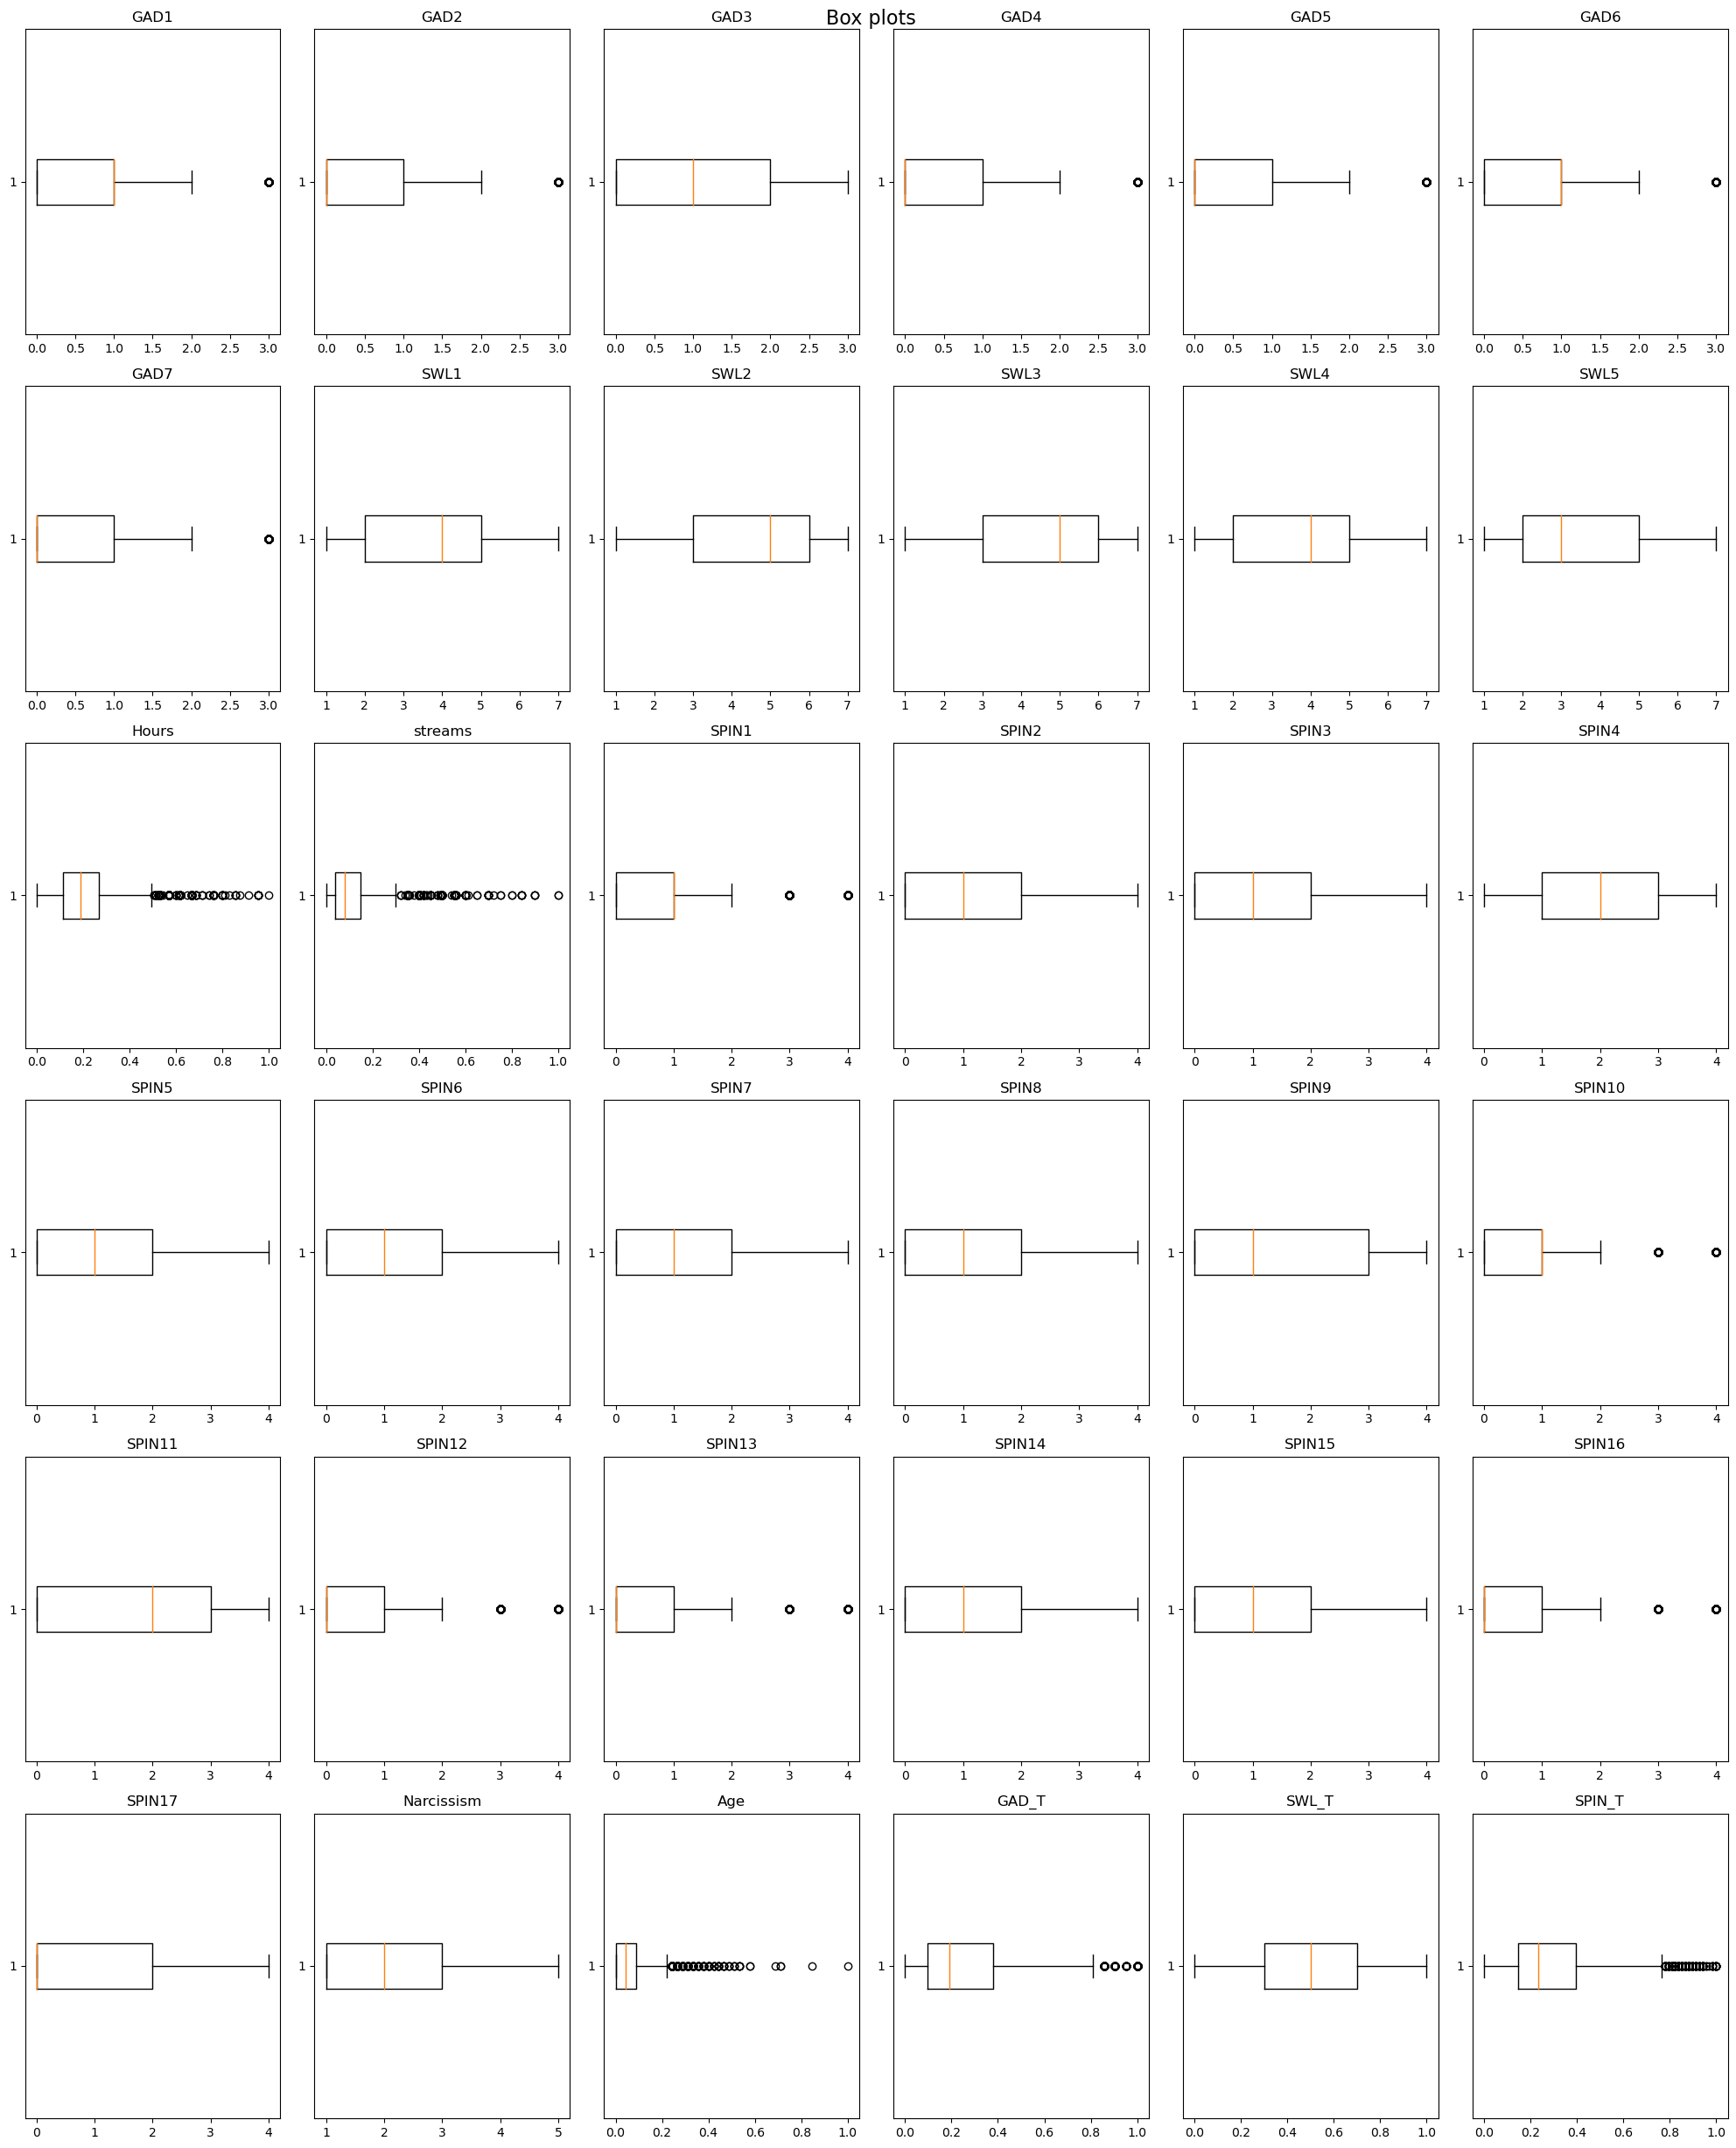

In [58]:
import matplotlib.pyplot as plt

numeric_columns = gaming_df.select_dtypes(exclude=['object']).columns
num_columns = len(numeric_columns)

fig, ax = plt.subplots(6, 6, figsize=(20, 25))  
axes = ax.flatten()

for i, (col_name, col_data) in enumerate(gaming_df[numeric_columns].items()):  
    if i < len(axes):
        axes[i].boxplot(col_data.dropna(), vert=False)  
        axes[i].set_title(col_name)

fig.suptitle('Box plots', fontsize=16)
plt.tight_layout()
plt.show()

In [59]:
gaming_df.drop( gaming_df[gaming_df['Age'] > 55].index , axis = 0 , inplace=True)

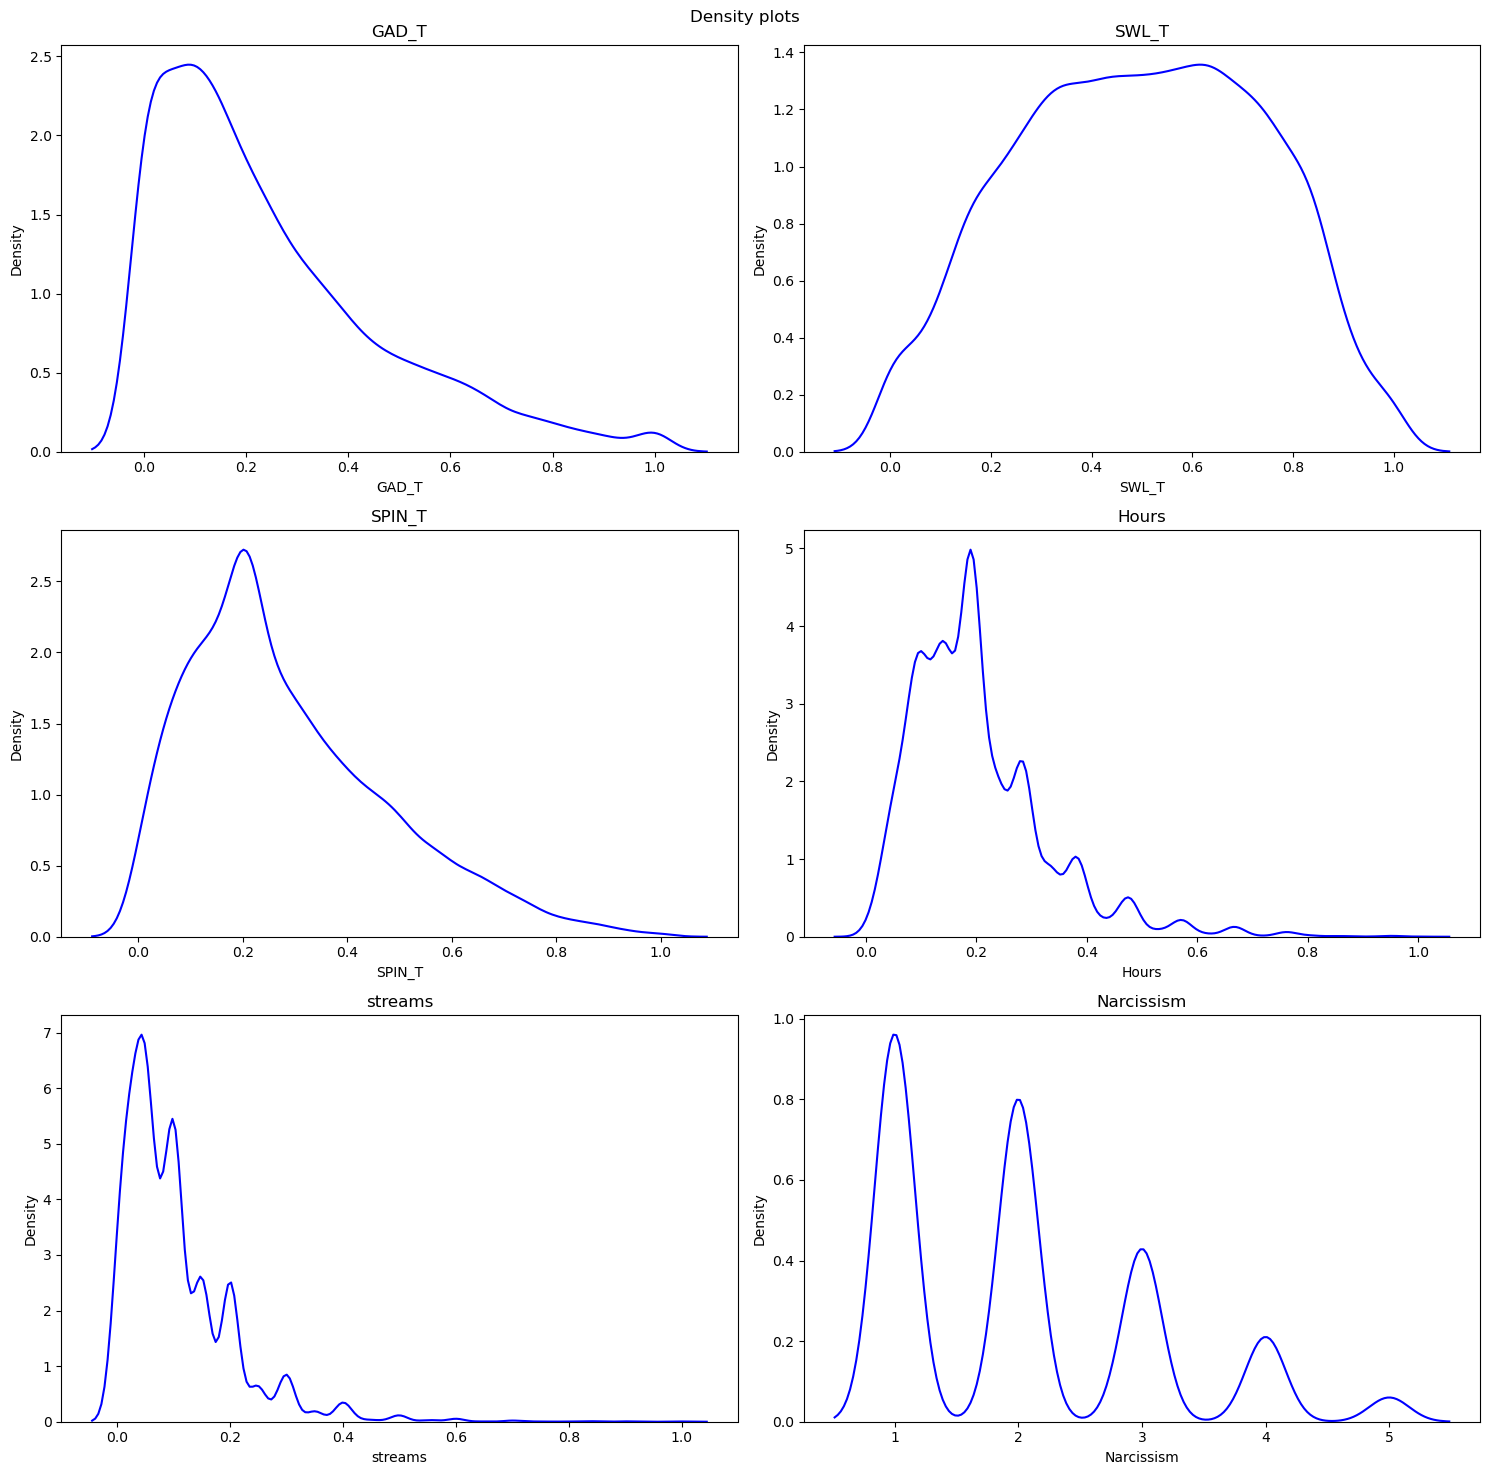

In [60]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
axes = ax.flatten()
columns_to_plot = ['GAD_T', 'SWL_T', 'SPIN_T', 'Hours', 'streams', 'Narcissism']

for i, col_name in enumerate(columns_to_plot):
    if i < len(axes):
        sns.kdeplot(gaming_df[col_name], ax=axes[i], color='b')
        axes[i].set_title(col_name)

fig.suptitle('Density plots')
plt.tight_layout()
plt.show()

1. GAD_T (Generalized Anxiety Disorder Total): The majority of the data seems to be concentrated at the lower end (close to 0), suggesting that most individuals in this dataset have relatively low GAD scores. <br><br>
2.  SWL_T (Satisfaction With Life Total): The distribution is more balanced with a peak in the middle, meaning a large portion of individuals in the dataset report moderate levels of life satisfaction. (Interesting moment: does this can be prove for the idea that everything tends to the normal distribution? <br><br>
3. SPIN_T (Social Phobia Inventory Total): This plot is right-skewed, showing that most people have low social phobia levels (closer to 0), with fewer people reporting higher levels of social anxiety. <br><br>
4. Hours: This is also right-skewed, indicating that most individuals in the dataset spend fewer hours in the activity. <br><br>
5. Streams: This plot is heavily right-skewed, showing that most people have very low engagement with streaming.<br><br>
6. Narcissism: This is an interesting plot, as it appears to show a multimodal distribution. There are distinct peaks, suggesting that there are clusters of individuals who fall into different ranges of narcissism scores.

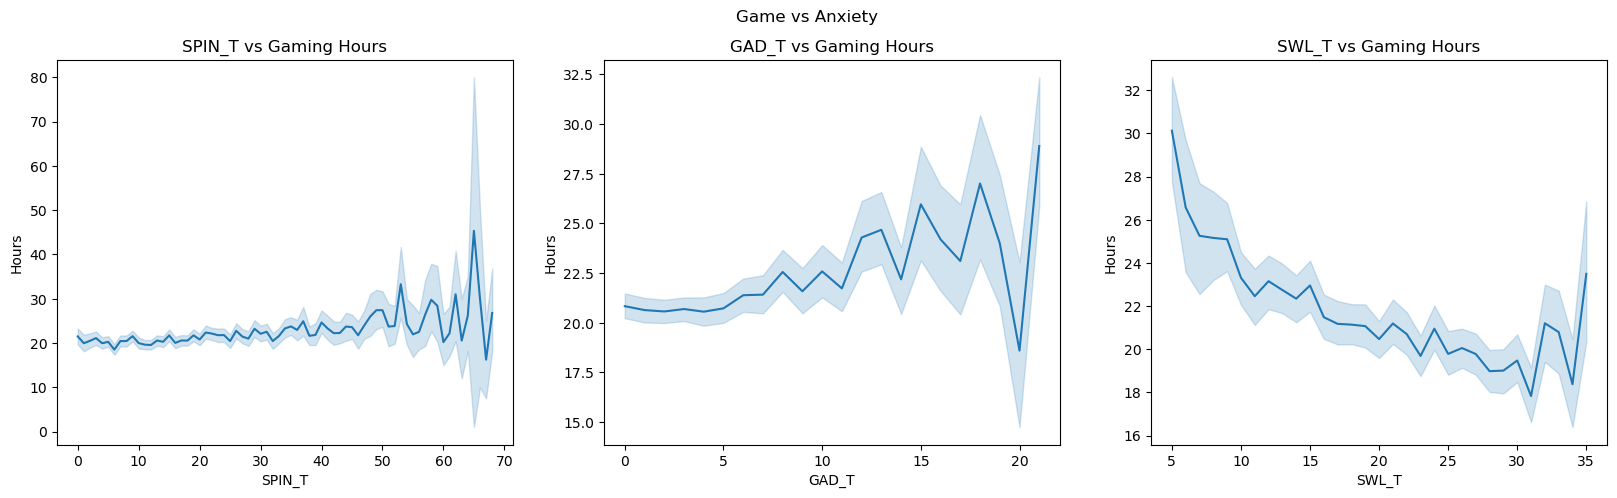

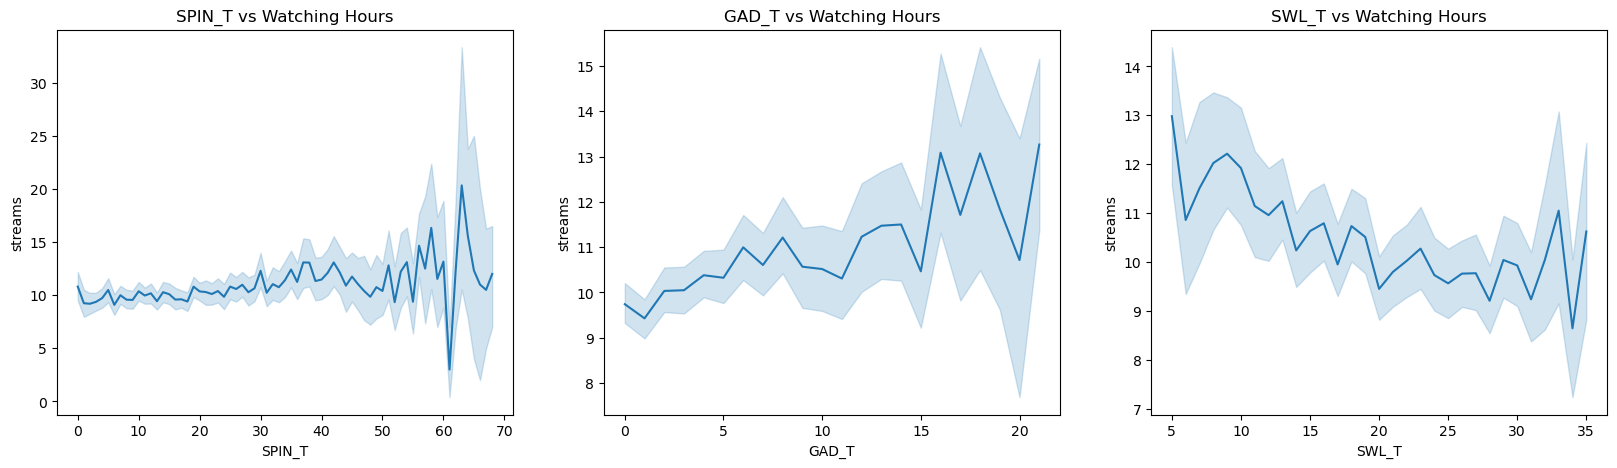

In [61]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
fig.suptitle('Game vs Anxiety')
labels = ['SPIN_T', 'GAD_T' , 'SWL_T']

for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="Hours", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Gaming Hours")
fig, axes = plt.subplots(1, 3, figsize=(20, 5) )
for count, ele in enumerate(labels):
    sns.lineplot(x=ele , y="streams", data=df , ax = axes[count])
    axes[count].set_title(f"{ele} vs Watching Hours")

The graphs represent relationships between different psychological metrics (such as anxiety, life satisfaction, and social phobia) and both gaming hours and watching streams hours. <br><br>The x-axis on each plot represents one psychological metric (e.g., SPIN_T, GAD_T, SWL_T).
The y-axis represents either hours spent gaming or hours spent watching streams.
The line plot shows how the average number of hours changes as the psychological metric increases.
The shaded area represents the confidence interval (typically one standard deviation above and below the mean), indicating the reliability of the trend.

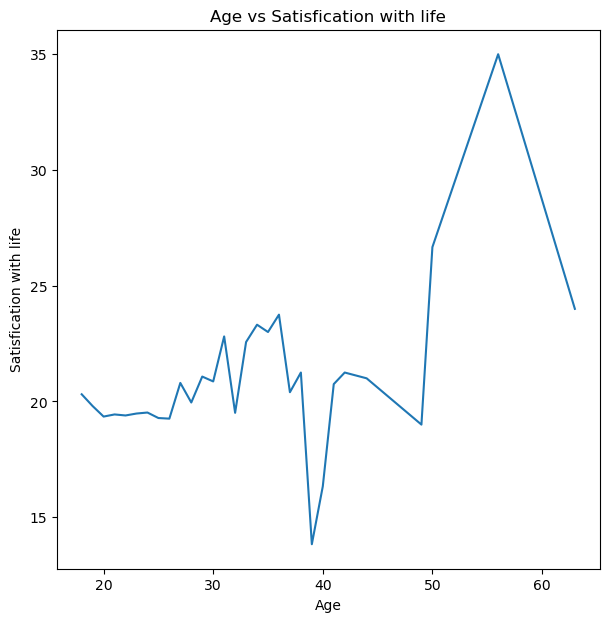

In [62]:
plt.figure(figsize=(7,7))
df.groupby('Age')['SWL_T'].mean().plot()
plt.title("Age vs Satisfication with life")
plt.xlabel("Age")
plt.ylabel("Satisfication with life");

Here we can see how satisfaction with life is related with age. Interesting part, people close to 40 are less satisfied with life, and they like playing games (due to the nature of the survey).

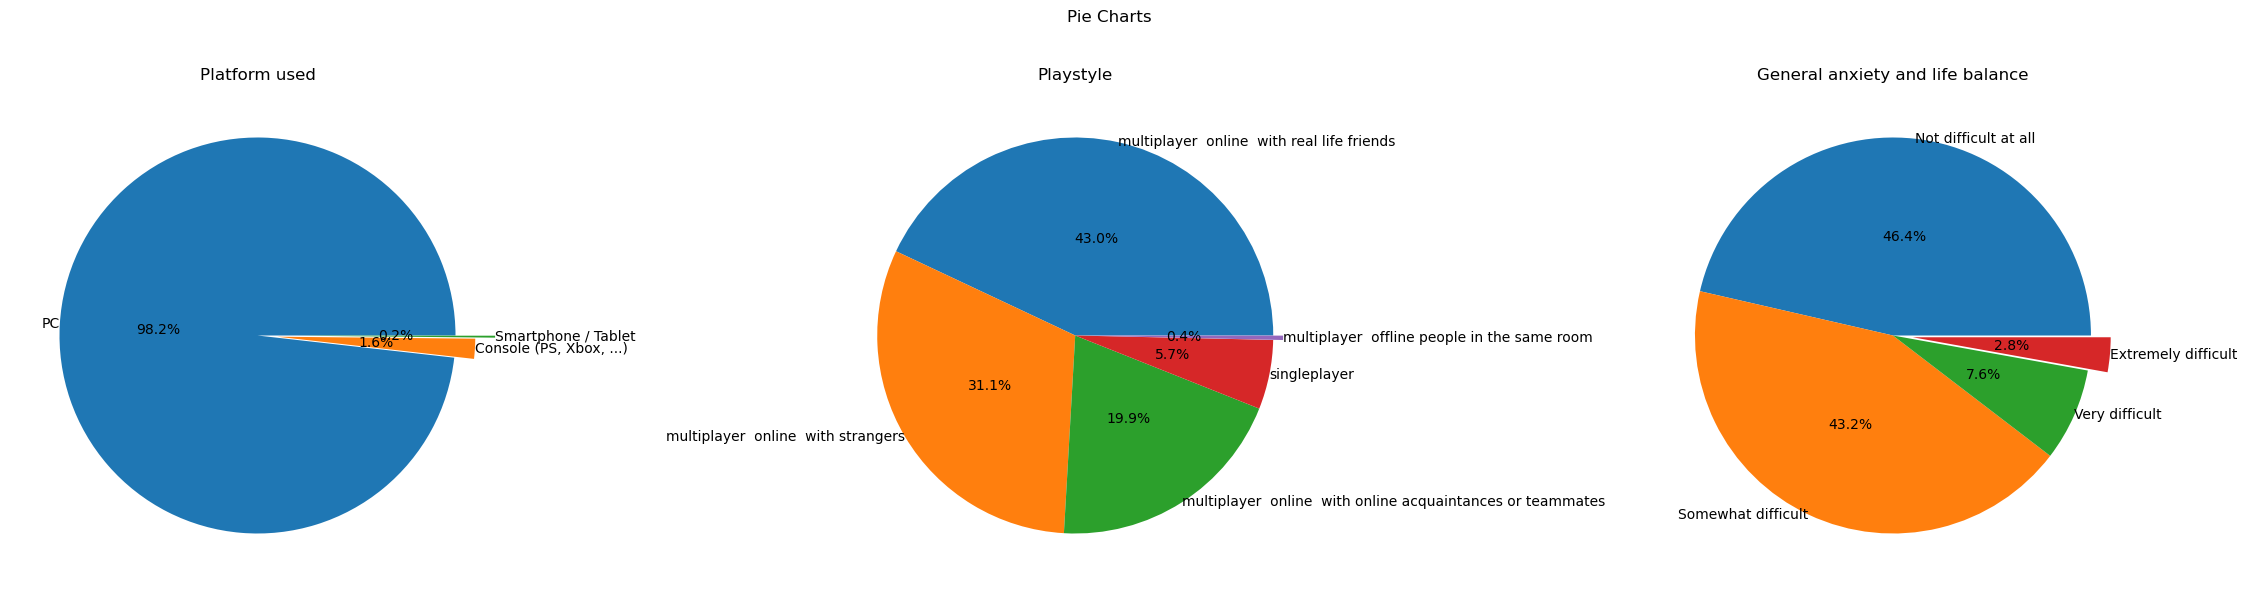

In [64]:
platform_data = gaming_df['Platform'].value_counts()
playstyle_data = gaming_df['Playstyle'].value_counts().head(5)
anxiety_data = gaming_df['GADE'].value_counts().head(5)

fig, axes = plt.subplots(1, 3, figsize=(23, 6))  
fig.suptitle('Pie Charts')

axes[0].pie(platform_data, labels=platform_data.index, autopct='%1.1f%%', explode=[0, 0.1, 0.2], pctdistance=0.5, labeldistance=1)
axes[0].set_title('Platform used')

axes[1].pie(playstyle_data, labels=playstyle_data.index, autopct='%1.1f%%', explode=[0, 0, 0, 0, 0.05], pctdistance=0.5, labeldistance=1)
axes[1].set_title('Playstyle')

axes[2].pie(anxiety_data, labels=anxiety_data.index, autopct='%1.1f%%', explode=[0, 0, 0, 0.1], pctdistance=0.5, labeldistance=1)
axes[2].set_title('General anxiety and life balance')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()


Here we can observe:
- mostly used platform is PC, so maybe it would be better to focus just on the PC users, and discard the answers of Console and mobile users;
- more than 90% of players play multiplayer games where the dominance is given to real-life teammates;
- 46% of players finds life and game balancing pretty easy, while others can see some drawbacks.

# Feature engineering

In [65]:
le = LabelEncoder()

In [66]:
for i in gaming_df.columns:
    if gaming_df[i].dtype == 'object':
        gaming_df[i] = le.fit_transform(gaming_df[i])

In [67]:
gaming_df.head(10)

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,SWL1,SWL2,...,Degree,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Timestamp_converted
0,0,0,0,0,1,0,0,1,3,5,...,0,103,2,4,0,0.047619,0.600000,0.073529,102,2015-02-17 00:06:17.568000207
1,1,2,2,2,0,1,0,2,3,5,...,0,103,2,3,0,0.380952,0.366667,0.485294,102,2015-02-17 00:09:47.520000241
3,0,0,0,0,0,0,0,1,2,5,...,0,103,2,1,0,0.000000,0.400000,0.161765,102,2015-02-17 01:37:58.655999853
4,2,1,2,2,2,3,2,3,2,2,...,1,90,2,3,0,0.666667,0.300000,0.191176,56,2015-02-17 02:08:51.072000207
5,0,0,0,0,0,1,0,1,3,5,...,0,103,2,2,0,0.047619,0.400000,0.191176,102,2015-02-17 03:08:54.816000008
6,0,0,0,0,0,0,0,1,3,4,...,1,103,2,1,0,0.000000,0.366667,0.382353,102,2015-02-17 03:30:33.408000207
7,0,0,0,0,0,0,0,2,3,6,...,0,50,2,4,0,0.000000,0.600000,0.205882,54,2015-02-17 03:49:23.519999939
8,2,3,2,2,0,1,2,3,2,3,...,0,103,2,3,0,0.571429,0.233333,0.808824,102,2015-02-17 04:44:12.768000146
9,2,1,2,2,2,1,0,2,3,3,...,1,31,2,1,0,0.476190,0.266667,0.382353,31,2015-02-17 05:31:07.680000069
10,3,3,3,3,1,3,3,2,5,5,...,1,103,2,4,0,0.904762,0.733333,0.088235,102,2015-02-17 05:48:32.255999775


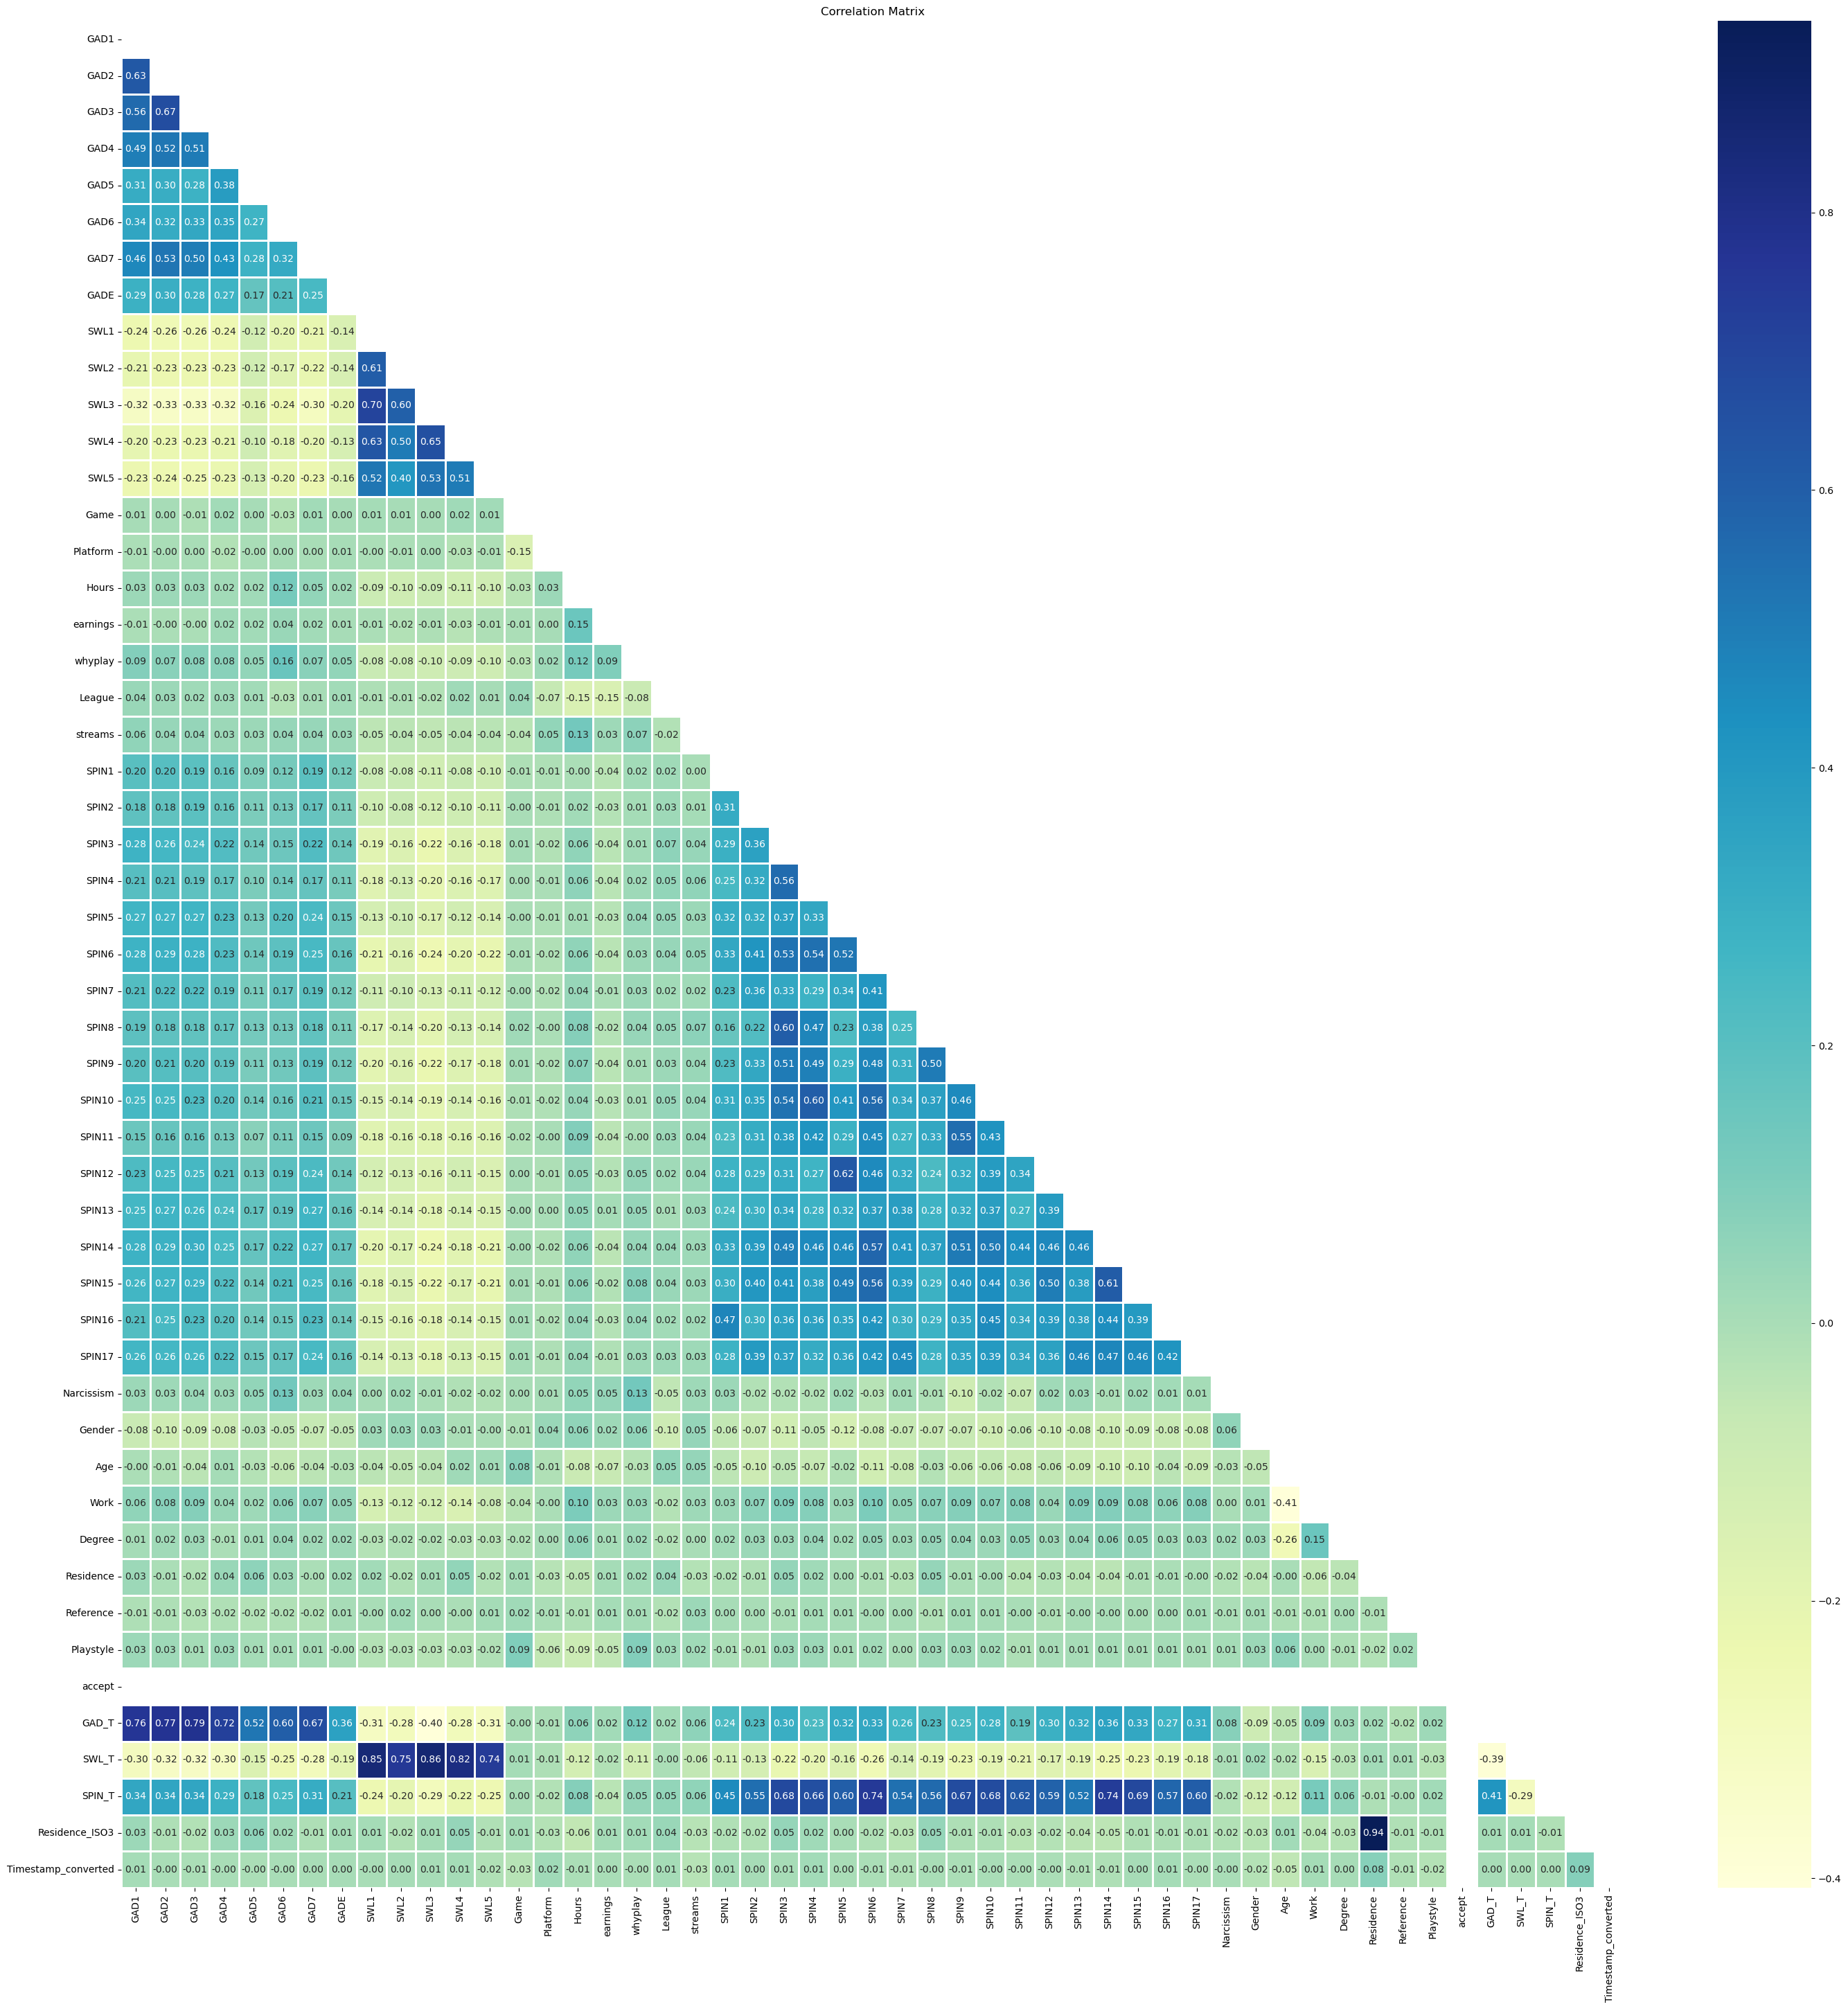

In [68]:
corr = gaming_df.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (35, 35))
cormat = sns.heatmap(corr, mask=mask, annot=True, cmap='YlGnBu', linewidths=1, fmt=".2f")
cormat.set_title('Correlation Matrix')
plt.show()

In [69]:
df1 = gaming_df[['GAD_T'  , 'SWL_T' , 'SPIN_T' ]]
df2 = gaming_df[[ 'Age' ,  'Hours' , 'streams' ]]

In [70]:
# we will use dimensionality reduction technique used to reduce the number of features in a dataset while 
# preserving as much variance (information) as possible
pc1 = PCA(n_components=2)
pc2 = PCA(n_components=2) 

In [71]:
x1 = pc1.fit_transform(df1)
x2 = pc2.fit_transform(df2)

In [72]:
x = x1 + x2

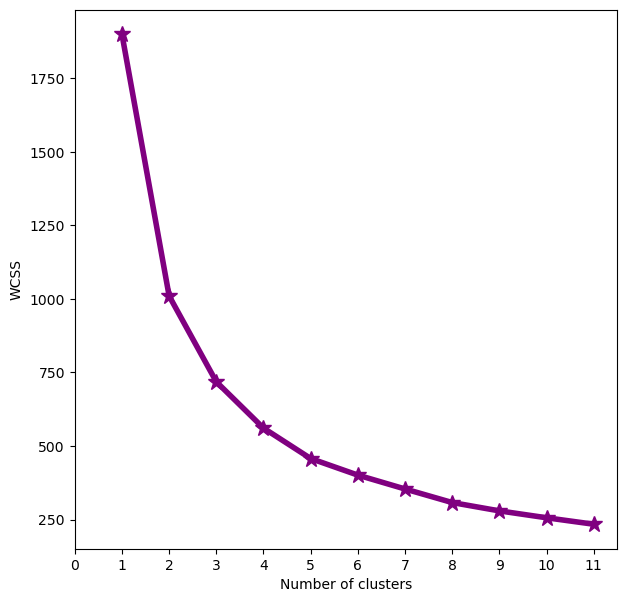

In [73]:
WCSS = []
for i in range(1,12):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(x)
    WCSS.append(model.inertia_) 
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,12), WCSS, linewidth=4, markersize=12, marker='*', color = 'purple')
plt.xticks(np.arange(12))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

As we can see, the best option is to make cluster of 5 groups.

# Basic AI algorithm

In [74]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 300, n_init = 40, random_state = 0)
y_clusters = model.fit_predict(x)

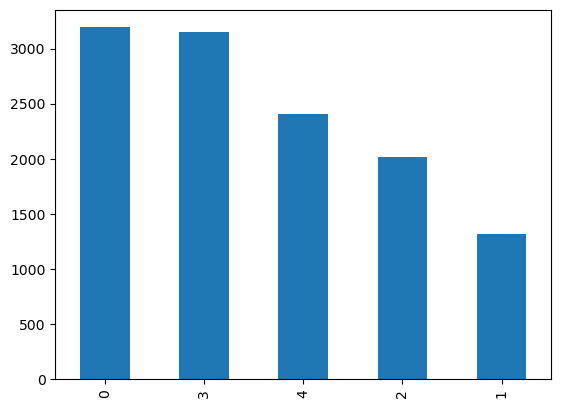

In [75]:
pd.Series(y_clusters).value_counts().plot(kind='bar');

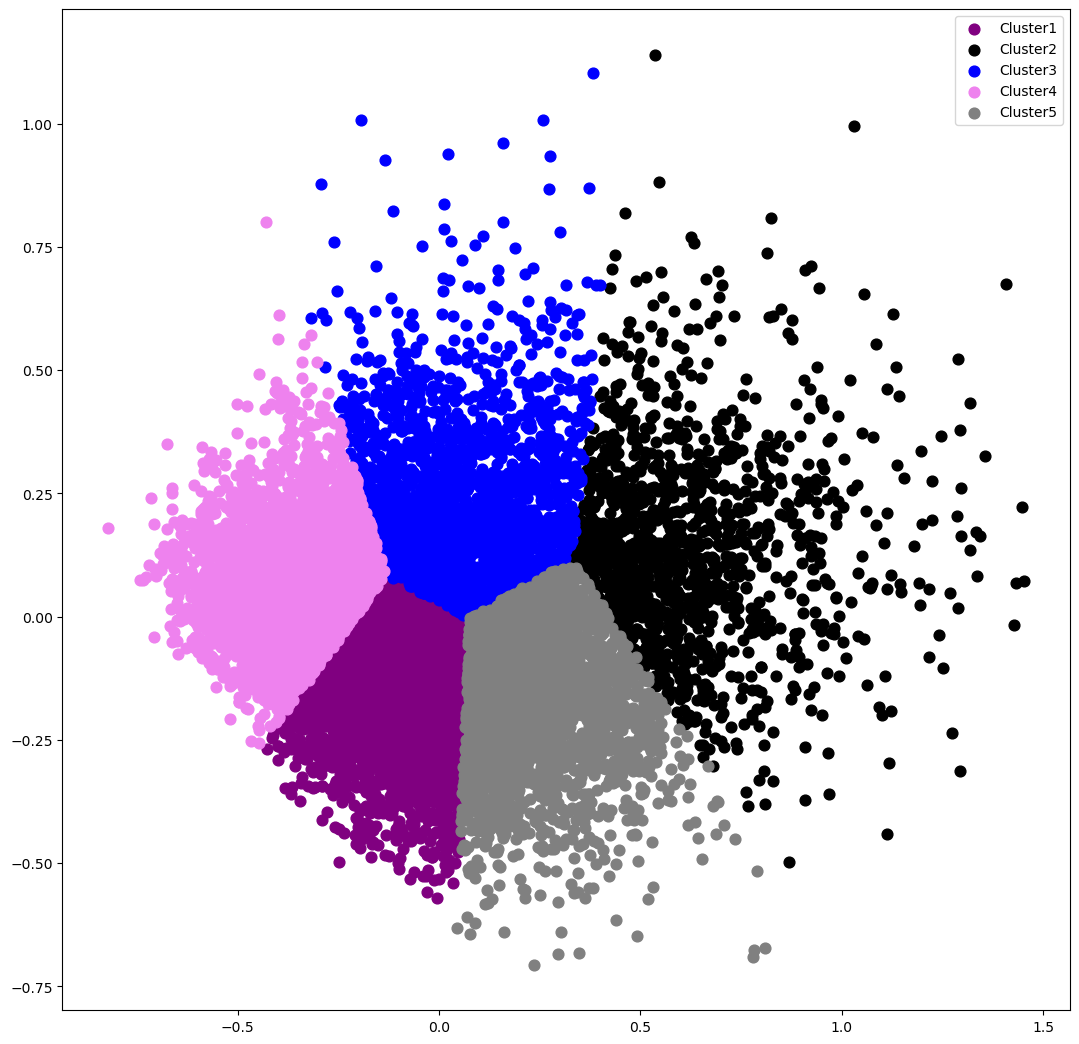

In [76]:
plt.figure(figsize=(13,13))

plt.scatter(x[y_clusters == 0, 0], x[y_clusters == 0, 1], s = 60, c = 'purple', label = 'Cluster1')
plt.scatter(x[y_clusters == 1, 0], x[y_clusters == 1, 1], s = 60, c = 'black', label = 'Cluster2')
plt.scatter(x[y_clusters == 2, 0], x[y_clusters == 2, 1], s = 60, c = 'blue', label = 'Cluster3')
plt.scatter(x[y_clusters == 3, 0], x[y_clusters == 3, 1], s = 60, c = 'violet', label = 'Cluster4')
plt.scatter(x[y_clusters == 4, 0], x[y_clusters == 4, 1], s = 60, c = 'grey', label = 'Cluster5') 

plt.legend()
plt.show()

In [77]:
gaming_df['Label'] = y_clusters

In [78]:
gaming_df['Label'].value_counts()

Label
0    3192
3    3147
4    2404
2    2015
1    1322
Name: count, dtype: int64

In [87]:
gaming_df2 = gaming_df.drop('Timestamp_converted', axis=1)
X = gaming_df2.iloc[:,:-1]
y = gaming_df2.iloc[:,-1]

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=44)

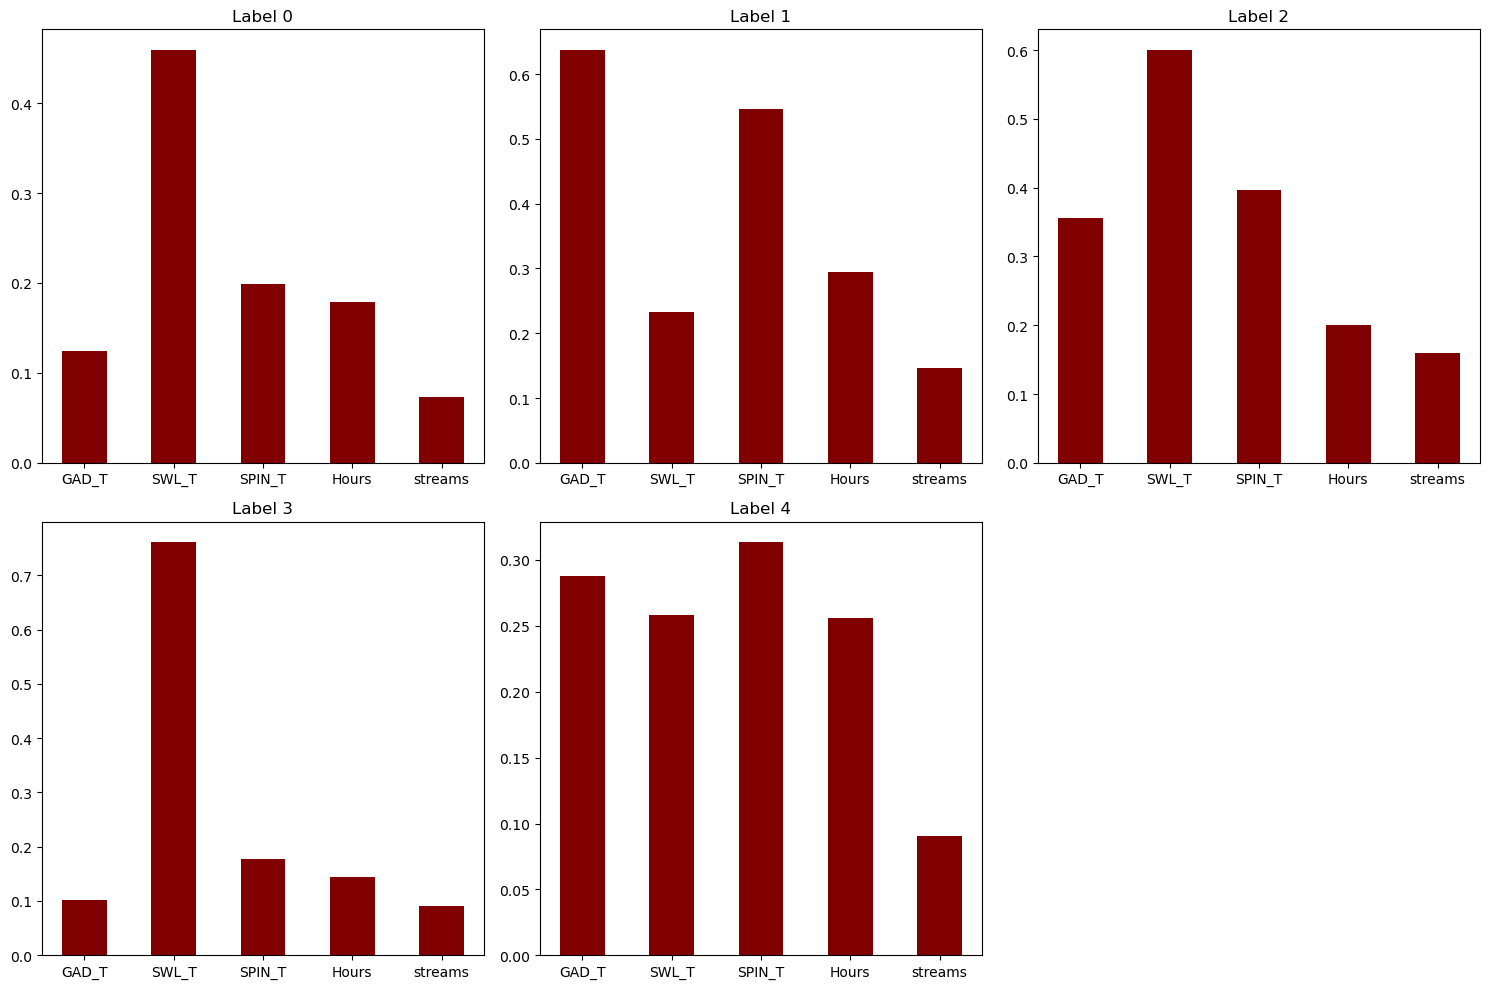

In [81]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows and 3 columns

for i in range(5): 
    l1 = gaming_df[gaming_df['Label'] == i]['GAD_T'].mean()
    l2 = gaming_df[gaming_df['Label'] == i]['SWL_T'].mean()
    l3 = gaming_df[gaming_df['Label'] == i]['SPIN_T'].mean()
    l4 = gaming_df[gaming_df['Label'] == i]['Hours'].mean()
    l5 = gaming_df[gaming_df['Label'] == i]['streams'].mean()

    c = [l1, l2, l3, l4, l5]

    row, col = divmod(i, 3)  
    
    axes[row, col].bar(['GAD_T', 'SWL_T', 'SPIN_T', 'Hours', 'streams'], c, color='maroon', width=0.5)
    axes[row, col].set_title(f'Label {i}')

axes[1, 2].axis('off')  

plt.tight_layout()
plt.show()

In [89]:
# Implementing Logistic Regression model

lc = LogisticRegression(max_iter=3250 , n_jobs=-1 )
lc.fit(X_train,y_train)
lc_pred = lc.predict(X_test)
accuracy_score(lc_pred,y_test)

0.9308774834437086

In [92]:
print(classification_report(lc_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       668
           1       0.92      0.93      0.93       276
           2       0.92      0.91      0.91       358
           3       0.95      0.95      0.95       630
           4       0.91      0.93      0.92       484

    accuracy                           0.93      2416
   macro avg       0.93      0.93      0.93      2416
weighted avg       0.93      0.93      0.93      2416



In [93]:
print(confusion_matrix(lc_pred,y_test))

[[614   0   4  25  25]
 [  0 258   2   0  16]
 [ 10  11 325   7   5]
 [ 16   0  13 601   0]
 [ 14  10   9   0 451]]


In [94]:
lc.score(X_train,y_train)

0.9415355960264901

In [95]:
lc.score(X_test,y_test)

0.9308774834437086

# Conclusion / Personal Insights

Observations : 

GAD, SWL  , SPIN
<br><br>Label 0:  Here the players play more than watching and have a happy with life but high social phobia 
<br><br>Label 1:  Considered as the best state, players are happy with life and its okay to play or be with people
<br><br>Label 2:  Players in this category are balancing between playing and watching streams, happy with their life but have high social phobia 
<br><br>Label 3:  They have a very high anxiety, which makes them not to be satisfied with their life at all, probably the worst case
<br><br>Label 4:  Average players located here, not very satisfied about life, have a little anxiety and social phobia

<br>Personal Insights about the dataset:
- In general it is a very good dataset to work on, but firstly it is cruical to check the survey first, analyze it and understand why this dataset was initially created and how.
- Most problematic part with this dataset was the missing values, especially the whole column was filled wiht NaN, so I just dropped it. Seems like this question in the survey was very unnecessary, or maybe the dataset was corrupted. With other features there were no such huge problems.
- Another annoying part was the presence of the 'Other' field in the survey, so they were a lot of unique answers in the categorical type of columns, so I needed to manage these too.
- With missing data I mostly used mean in numerical ones and mode in categorical ones, or if the size was less than 100, then I just dropped the rows with NaN (the dataset is large enough to allow this decision).
- I used MinMaxScaler for numerical data, and LabelEncoder for categorical data. These are pretty common and efficient in use with small-average datasets.

<br> Other personal thoughts and notes were added at the relevant places of this notebook.